# Improve Data Quality

[GitHub original page](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/launching_into_ml/solutions/improve_data_quality.ipynb)

Notebook che mostra alcune delle operazioni standard che vengono eseguite quando si ha a che fare con un dataset per la prima volta, e si fa una prima analisi per migliorare la qualità base dei dati che si hanno a disposizione.

Si parte dall'importare TF per alcune operazioni basiche.

In [1]:
# Importing necessary tensorflow library and printing the TF version.
import tensorflow as tf

print("TensorFlow version: ",tf.version.VERSION)

2024-03-18 12:11:27.215528: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-18 12:11:27.661370: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 12:11:29.076768: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow version:  2.16.1


In [2]:
import os
# Here we'll import Pandas and Numpy data processing libraries
import pandas as pd  
import numpy as np
from datetime import datetime
# Use matplotlib for visualizing the model
import matplotlib.pyplot as plt
# Use seaborn for data visualization
import seaborn as sns
%matplotlib inline

Creazione della cartella dei dati, loro scaricamento dall'internet. Per questo step, serve aver scaricato in locale la Gsutil di Google, o, più precisamente, la [Gsuit](https://cloud.google.com/storage/docs/gsutil_install). Il comando `gsuit` è stato poi eseguito da terminale, non in questo notebook.

In [3]:
# Creating directory to store dataset
if not os.path.isdir("../data/transport"):
    os.makedirs("../data/transport")

In [4]:
# Download the raw .csv data by copying the data from a cloud storage bucket.
!gsutil cp gs://cloud-training/mlongcp/v3.0_MLonGC/toy_data/untidy_vehicle_data_toy.csv ../data/transport

/bin/bash: gsutil: comando non trovato


In [5]:
# ls shows the working directory's contents.
# Using the -l parameter will lists files with assigned permissions
!ls -l ../data/transport

totale 24
-rw-r--r-- 1 ddosso@siav.net domain users@siav.net 24263 mar 14 12:34 untidy_vehicle_data_toy.csv


## Read the Dataset into a Pandas DataFrame

Si carica il dataset dal file csv e si visualizzano le prime righe, per avere, se possibile, una veloce occhiata alle colonne e ai tipi di dato oltre, potenzialmente, a possibili presente di valori null e di cose strane più in generale. 

In [6]:
# Reading "untidy_vehicle_data_toy.csv" file using the read_csv() function included in the pandas library.
df_transport = pd.read_csv('../data/transport/untidy_vehicle_data_toy.csv')

# Output the first five rows.
df_transport.head(10) 

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,10/1/2018,90000.0,2006,Gasoline,OTHER/UNK,NaN,1.0
1,10/1/2018,NaN,2014,Gasoline,NaN,Yes,1.0
2,NaN,90000.0,NaN,Gasoline,OTHER/UNK,Yes,NaN
3,10/1/2018,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0
4,10/1/2018,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0
5,10/1/2018,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,Yes,2.0
6,10/1/2018,90000.0,<2006,Diesel and Diesel Hybrid,WHITE,No,19.0
7,10/1/2018,90000.0,<2006,Battery Electric,OTHER/UNK,No,4.0
8,10/1/2018,90000.0,<2006,Gasoline,Type_A,Yes,33.0
9,10/2/2018,90000.0,<2006,Gasoline,Type_B,Yes,11.0


`object`, per Pandas, è tipicamente il tipo di dato stringa. Vediamo, usando `info`, i tipi di dato, quante entries ci sono, e se alcune di esse hanno dei valori a null

In [7]:
# The .info() function will display the concise summary of an dataframe.
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        497 non-null    object 
 1   Zip Code    497 non-null    float64
 2   Model Year  497 non-null    object 
 3   Fuel        497 non-null    object 
 4   Make        496 non-null    object 
 5   Light_Duty  496 non-null    object 
 6   Vehicles    496 non-null    float64
dtypes: float64(2), object(5)
memory usage: 27.4+ KB


In [8]:
# Let's print out the first and last five rows of each column.
print(df_transport)


          Date  Zip Code Model Year                      Fuel       Make  \
0    10/1/2018   90000.0       2006                  Gasoline  OTHER/UNK   
1    10/1/2018       NaN       2014                  Gasoline        NaN   
2          NaN   90000.0        NaN                  Gasoline  OTHER/UNK   
3    10/1/2018   90000.0       2017                  Gasoline  OTHER/UNK   
4    10/1/2018   90000.0      <2006  Diesel and Diesel Hybrid  OTHER/UNK   
..         ...       ...        ...                       ...        ...   
494  12/3/2018   90002.0       2010                  Gasoline     Type_I   
495  12/4/2018   90002.0       2010                  Gasoline     Type_B   
496  12/5/2018   90002.0       2010                  Gasoline     Type_C   
497  12/6/2018   90002.0       2010                  Gasoline     Type_J   
498  12/7/2018   90002.0       2010                  Gasoline     Type_J   

    Light_Duty  Vehicles  
0          NaN       1.0  
1          Yes       1.0  
2     

Avendo delle colonne numeriche, possiamo usare `describe` per farci restituire alcune informazioni interessanti. 

---

In pandas, la funzione `describe()` è utilizzata per ottenere una panoramica statistica dei dati contenuti in un DataFrame. Questa funzione fornisce diverse statistiche descrittive che possono aiutare a comprendere la distribuzione e la natura dei dati. Ecco una panoramica dell'utilizzo della funzione `describe()`:

1. **Sintassi di base**:
   ```python
   dataframe.describe()
   ```
   Questo restituirà una serie di statistiche descrittive per ogni colonna numerica nel DataFrame, come la media, la deviazione standard, i valori min e max, i quartili e altro ancora.

2. **Parametri opzionali**:
   - `include`: È possibile specificare quali tipi di dati includere nella descrizione utilizzando il parametro `include`. Ad esempio, `include='all'` include tutte le colonne, mentre `include='object'` includerà solo colonne di tipo oggetto.
   - `percentiles`: È possibile specificare i percentili da calcolare utilizzando il parametro `percentiles`.
   - `datetime_is_numeric`: Se i dati contengono colonne di tipo datetime, è possibile specificare se considerarle numericamente impostando `datetime_is_numeric=True`.

3. **Output**:
   Il risultato restituito dalla funzione `describe()` è un DataFrame dove le righe corrispondono alle statistiche descrittive e le colonne corrispondono alle colonne numeriche del DataFrame originale.

Esempio di utilizzo:
```python
import pandas as pd

# Creazione di un DataFrame di esempio
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50],
        'C': ['a', 'b', 'c', 'd', 'e']}
df = pd.DataFrame(data)

# Utilizzo della funzione describe()
description = df.describe()

print(description)
```

Questo restituirebbe le statistiche descrittive per le colonne numeriche 'A' e 'B'. La colonna 'C', essendo di tipo oggetto, non verrebbe inclusa a meno che non si specificasse `include='all'`.

In [9]:
# We can use .describe() to see some summary statistics for the numeric fields in our dataframe.
df_transport.describe()

,Zip Code,Vehicles
count,497.00000,496.000000
mean,89838.23340,74.512097
std,3633.35609,243.839871
min,9001.00000,1.000000
25%,90001.00000,14.000000
50%,90001.00000,25.000000
75%,90001.00000,56.250000
max,90002.00000,3178.000000


### Group By

1. **Raggruppamento**: La funzione `groupby()` di pandas è utilizzata per suddividere i dati in gruppi basati su una o più chiavi di raggruppamento. Nel tuo caso, le colonne specificate come argomenti di `groupby()` - 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Light_Duty', e 'Vehicles' - vengono utilizzate come criteri di raggruppamento.

2. **Importanza**:
   - **Analisi dei dati**: Questo tipo di operazione è utile quando si desidera analizzare o aggregare i dati in base a diverse dimensioni o categorie. Ad esempio, potresti voler calcolare la somma, la media o altre statistiche per ciascun gruppo di dati identificato dalle combinazioni uniche di valori nelle colonne specificate.
   - **Visualizzazione**: Il raggruppamento può essere fondamentale per creare visualizzazioni che mostrano le tendenze o le distribuzioni dei dati in base a diverse dimensioni.
   - **Elaborazione dei dati**: A volte è necessario manipolare i dati in base a gruppi specifici per eseguire ulteriori analisi o calcoli.

3. **Output**:
   Dopo aver raggruppato i dati, è possibile applicare varie funzioni di aggregazione ai gruppi risultanti, come somma, media, conteggio, ecc., per ottenere statistiche aggregate su ciascun gruppo.

Ad esempio, potresti eseguire operazioni come:
```python
# Calcolare la somma delle 'Vehicles' per ciascun gruppo
grouped_data['Vehicles'].sum()

# Calcolare la media delle 'Vehicles' per ciascun gruppo
grouped_data['Vehicles'].mean()

# Ottenere il conteggio di righe in ciascun gruppo
grouped_data.size()
```

In definitiva, questa operazione di raggruppamento è importante perché consente di analizzare e comprendere meglio i dati in base a diverse dimensioni o categorie, facilitando l'analisi e l'interpretazione dei dati.

In [10]:
# The .groupby() function is used for spliting the data into groups based on some criteria.
grouped_data = df_transport.groupby(['Zip Code','Model Year','Fuel','Make','Light_Duty','Vehicles'])

Ad esempio, la cella seguente raggruppa le tuple in base al contenuto del campo Fuel, una variabile categorica. Successivamente, si applica la funzione `first`, che identifica la prima tupla in ogni gruppo. QUesto ci permette di osservare un esempio per ognuno dei gruppi basati sul contenuto di `Fuel`.

In [11]:
 # Get the first entry for each month.
df_transport.groupby('Fuel').first()

,Date,Zip Code,Model Year,Make,Light_Duty,Vehicles
Fuel,,,,,,
Battery Electric,10/1/2018,90000.0,<2006,OTHER/UNK,No,4.0
Diesel and Diesel Hybrid,10/1/2018,90000.0,<2006,OTHER/UNK,No,55.0
Flex-Fuel,10/14/2018,90001.0,2007,Type_A,Yes,78.0
Gasoline,10/1/2018,90000.0,2006,OTHER/UNK,Yes,1.0
Hybrid Gasoline,10/24/2018,90001.0,2009,OTHER/UNK,Yes,18.0
Natural Gas,10/25/2018,90001.0,2009,OTHER/UNK,No,2.0
Other,10/8/2018,90000.0,<2006,OTHER/UNK,Yes,6.0
Plug-in Hybrid,11/2/2018,90001.0,2012,OTHER/UNK,Yes,1.0


### Numero di elementi nulli

1. **`df_transport.isnull()`**: Questo codice restituisce un DataFrame booleano dello stesso formato di `df_transport`, dove ogni cella è `True` se il valore corrispondente in `df_transport` è mancante (NaN), altrimenti è `False`.

2. **`.sum()`**: Viene quindi chiamato il metodo `sum()` su questo DataFrame booleano. Quando si chiama `sum()` su un DataFrame booleano, verrà eseguita la somma lungo l'asse delle righe per ciascuna colonna. Poiché `True` viene considerato come 1 e `False` come 0, la somma dei valori `True` per ogni colonna corrisponde al numero totale di valori mancanti in quella colonna.

Quindi, `df_transport.isnull().sum()` restituisce una Serie (una struttura dati di pandas) che contiene il numero di valori mancanti per ciascuna colonna nel DataFrame `df_transport`. Questo può essere utile per valutare la qualità dei dati e decidere come trattare i valori mancanti durante l'analisi o la pulizia dei dati.

In [12]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

Vediamo in particolare cosa combina la funzione `isnull` in pratica

In [13]:
print (df_transport['Date'], "\n")
print (df_transport['Date'].isnull())

0      10/1/2018
1      10/1/2018
2            NaN
3      10/1/2018
4      10/1/2018
         ...    
494    12/3/2018
495    12/4/2018
496    12/5/2018
497    12/6/2018
498    12/7/2018
Name: Date, Length: 499, dtype: object 

0      False
1      False
2       True
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Date, Length: 499, dtype: bool


In [14]:
print (df_transport['Make'])
print (df_transport['Make'].isnull())

0      OTHER/UNK
1            NaN
2      OTHER/UNK
3      OTHER/UNK
4      OTHER/UNK
         ...    
494       Type_I
495       Type_B
496       Type_C
497       Type_J
498       Type_J
Name: Make, Length: 499, dtype: object
0      False
1       True
2      False
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Make, Length: 499, dtype: bool


In [15]:
print (df_transport['Model Year'])
print (df_transport['Model Year'].isnull())

0       2006
1       2014
2        NaN
3       2017
4      <2006
       ...  
494     2010
495     2010
496     2010
497     2010
498     2010
Name: Model Year, Length: 499, dtype: object
0      False
1      False
2       True
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Model Year, Length: 499, dtype: bool


Guardiamo ora alcuni metodi che sono utili in generale. In particolare:

- come avere il numero di righe
- come avere il numero di colonne
- come avere la lista di features
- come listare il numero di valori unici per ogni feature
- il numero totale di valori (celle) a NaN nel dataframe

In [16]:
# In Python shape() is used in pandas to give the number of rows/columns.
# The number of rows is given by .shape[0]. The number of columns is given by .shape[1].
# Thus, shape() consists of an array having two arguments -- rows and columns
print ("Rows     : " ,df_transport.shape[0])
print ("Columns  : " ,df_transport.shape[1])
print ("\nFeatures : \n" ,df_transport.columns.tolist())
print ("\nUnique values :  \n",df_transport.nunique())
print ("\nMissing values :  ", df_transport.isnull().sum().values.sum())

Rows     :  499
Columns  :  7

Features : 
 ['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Light_Duty', 'Vehicles']

Unique values :  
 Date          130
Zip Code        4
Model Year     15
Fuel            8
Make           43
Light_Duty      2
Vehicles      151
dtype: int64

Missing values :   17


In [17]:
# Output the last five rows in the dataset.
df_transport.tail()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
494,12/3/2018,90002.0,2010,Gasoline,Type_I,Yes,11.0
495,12/4/2018,90002.0,2010,Gasoline,Type_B,Yes,58.0
496,12/5/2018,90002.0,2010,Gasoline,Type_C,Yes,45.0
497,12/6/2018,90002.0,2010,Gasoline,Type_J,Yes,82.0
498,12/7/2018,90002.0,2010,Gasoline,Type_J,Yes,12.0


## Data Quality Issues

Riflettiamo su alcune issue che possiamo avere con i nostri dati. 

* Colonne Categoriche: La colonna delle caratteristiche "Light_Duty" è categorica e presenta una scelta "Sì/No". Non possiamo fornire valori del genere a un modello di machine learning. Inoltre, dobbiamo codificare in "one-hot" le rimanenti colonne di tipo "stringa"/"oggetto".

* Anno del Modello: Siamo interessati solo agli anni successivi al 2006, non a "<2006".

* Tipo di Dati "Data": La data è mostrata come un tipo di dato "oggetto" e dovrebbe essere di tipo datetime. Inoltre, la data è in una sola colonna. Il nostro requisito aziendale, supponiamo, è quello di suddividere la data in anno, mese e giorno.

* Valori Mancanti: Ogni colonna delle caratteristiche ha diversi valori mancanti. In effetti, abbiamo un totale di 17 valori mancanti.

* Caratteristiche Temporali: Come gestiamo anno, mese e giorno?

Osserviamo come si risolvono i vari problemi.

### Risoluzione dei Valori Mancanti

La maggior parte degli algoritmi non accetta valori mancanti. Tuttavia, quando vediamo valori mancanti nel nostro dataset, c'è sempre la tendenza a semplicemente "eliminare tutte le righe" con valori mancanti. Anche se Pandas riempirà lo spazio vuoto con "NaN", dovremmo "gestirli" in qualche modo.

Sebbene tutti i metodi per gestire i valori mancanti siano al di là dello scopo di questo laboratorio, ci sono alcuni metodi che dovresti considerare. Per le colonne numeriche, utilizza i valori "medi" per riempire i valori numerici mancanti. Per le colonne categoriche, utilizza la "moda" (o valori più frequenti) per riempire i valori categorici mancanti.

In questo laboratorio, utilizziamo le funzioni `.apply` combinata con una Lambda unction per riempire ogni colonna con il proprio valore più frequente. 

Controlliamo di nuovo i valori mancanti mostrando quanti record contengono valori NaN per ciascuna colonna delle caratteristiche.

In [18]:
# The isnull() method is used to check and manage NULL values in a data frame.
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

In [19]:
# Here we are using the apply function with lambda.
# We can use the apply() function to apply the lambda function to both rows and columns of a dataframe.
df_transport = df_transport.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [20]:
# The isnull() method is used to check and manage NULL values in a data frame.
# TODO 1c
df_transport.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Light_Duty    0
Vehicles      0
dtype: int64

### Convert the Date Feature Column to a Datetime Format

In [21]:
# The date column is indeed shown as a string object. We can convert it to the datetime datatype with the to_datetime() function in Pandas.
df_transport['Date'] =  pd.to_datetime(df_transport['Date'],
                              format='%m/%d/%Y')

In [22]:
# Date is now converted and will display the concise summary of an dataframe.
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 27.4+ KB


In [23]:
# Now we will parse Date into three columns that is year, month, and day.
df_transport['year'] = df_transport['Date'].dt.year
df_transport['month'] = df_transport['Date'].dt.month
df_transport['day'] = df_transport['Date'].dt.day

#df['hour'] = df['date'].dt.hour - you could use this if your date format included hour.
#df['minute'] = df['date'].dt.minute - you could use this if your date format included minute.

# The .info() function will display the concise summary of an dataframe.
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
 7   year        499 non-null    int32         
 8   month       499 non-null    int32         
 9   day         499 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(4)
memory usage: 33.3+ KB


In [24]:
# Here, we are creating a new dataframe called "grouped_data" and grouping by on the column "Make"
grouped_data = df_transport.groupby(['Make'])

# Get the first entry for each month.
df_transport.groupby('month').first()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles,year,day
month,,,,,,,,,
1,2019-01-01,90001.0,2016,Gasoline,Type_G,Yes,18.0,2019,1
2,2019-02-01,90001.0,2017,Gasoline,Type_D,Yes,13.0,2019,1
3,2019-03-01,90001.0,2018,Gasoline,Type_C,Yes,32.0,2019,1
10,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,1
11,2018-11-01,90001.0,2007,Gasoline,Type_M,Yes,15.0,2018,1
12,2018-12-02,90001.0,2015,Gasoline,Type_G,Yes,19.0,2018,2


Ora abbiamo ricondotto le date a degli "interi". Possiamo fare un po' di plot:

Text(0.5, 1.0, 'Vehicles by Month')

<Figure size 1400x800 with 0 Axes>

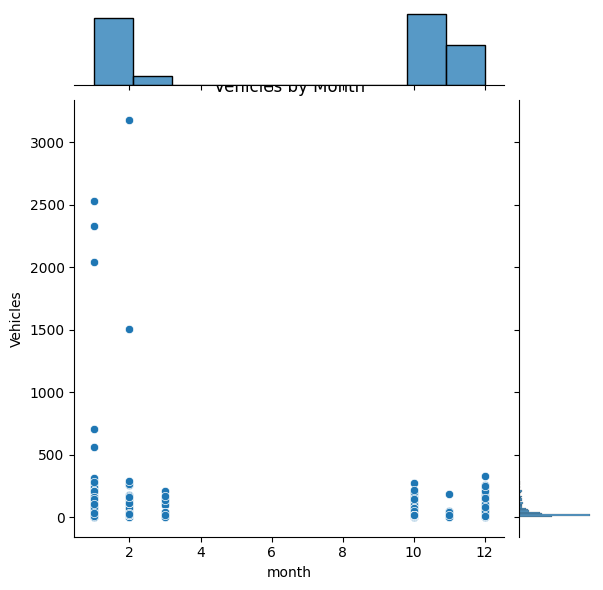

In [25]:
# Here we will visualize our data using the figure() function in the pyplot module of matplotlib's library -- which is used to create a new figure.
plt.figure(figsize=(14, 8))

# Seaborn's .jointplot() displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.
sns.jointplot(x='month',y='Vehicles',data=df_transport)

# The title() method in matplotlib module is used to specify title of the visualization depicted and displays the title using various attributes.
plt.title('Vehicles by Month')

### Rinomina le  Colonna Feature e Rimuovi un Valore.

Le colonne delle nostre caratteristiche hanno "capitalizzazioni" diverse nei loro nomi, ad esempio sia maiuscole che minuscole. Inoltre, ci sono "spazi" in alcuni dei nomi delle colonne. Inoltre, siamo interessati solo agli anni successivi al 2006, non a "<2006".

Possiamo risolvere anche il problema della "capitalizzazione" rendendo tutti i nomi delle colonne delle features in minuscolo.

In [26]:
# Let's remove all the spaces for feature columns by renaming them.
df_transport.rename(columns = { 'Date': 'date', 'Zip Code':'zipcode', 'Model Year': 'modelyear', 'Fuel': 'fuel', 'Make': 'make', 'Light_Duty': 'lightduty', 'Vehicles': 'vehicles'}, inplace = True) 

# Output the first two rows.
df_transport.head(2)


,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1


Successivamente creiamo una copia del DataFrame per evitare il messaggio di avvertimento "SettingWithCopyWarning: Un valore sta cercando di essere impostato su una copia di una porzione di un DataFrame".

In [27]:
# Here, we create a copy of the dataframe to avoid copy warning issues.
df = df_transport.loc[df_transport.modelyear != '<2006'].copy()

In [28]:
# Here we will confirm that the modelyear value '<2006' has been removed by doing a value count.
df['modelyear'].value_counts(0)

modelyear
2007    53
2008    45
2006    36
2010    34
2014    31
2015    30
2016    29
2017    29
2013    27
2009    25
2012    25
2011    24
2018    23
2019     5
Name: count, dtype: int64

### Gestione delle Colonne Categoriche

La colonna delle caratteristiche "lightduty" è categorica e presenta una scelta "Sì/No". Non possiamo alimentare valori del genere in un modello di machine learning. Dobbiamo convertire le risposte binarie da stringhe di sì/no in interi di 1/0. Ci sono vari metodi per ottenere questo. Utilizzeremo il metodo "apply" con un'espressione lambda. Pandas. apply() prende una funzione e la applica a tutti i valori di una serie di Pandas.
Cos'è una Funzione Lambda?

Tipicamente, Python richiede che tu definisca una funzione utilizzando la parola chiave def. Tuttavia, le funzioni lambda sono anonime - il che significa che non c'è bisogno di nominarle. Il caso d'uso più comune per le funzioni lambda è nel codice che richiede una funzione semplice su una sola riga (ad esempio, le lambda hanno solo una singola espressione).

Notiamo che qui sotto usiamo il metodo `value_counts`, che serve per contare la frequenza di ogni riga nel dataframe. Può essere applicato sia a un dataframe che a una Series, e conta il numero di volte per cui uno specifico valore appare. 

In [29]:
# Lets count the number of "Yes" and"No's" in the 'lightduty' feature column.
df['lightduty'].value_counts(0)

lightduty
Yes    374
No      42
Name: count, dtype: int64

In [30]:
# Confirm that "lightduty" has been converted.
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,No,16.0,2018,10,9
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,No,23.0,2018,10,10


## one hot encoding

Gli algoritmi di ML si aspettano chiaramente dei vettori di numeri come input, non feature categoriche. In particolare, a parte specifici algoritmi, non sanno gestire testo o stringhe. È pertanto utile spesso trasformare le feature categoriche in vettori. Una trasformazione è creare variabili dummy per le nostre feature categoriche, ossia variabili che sono binarie, 0 o 1, che rappresentano ciascuna una delle classi del dominio della feature categorica. In questo modo, una feature categorica diventa un array la cui dimensione è pari al numero di possibili scelte per quella feature.  Panda mette a disposizione una feature per fare tutto questo. 

In [31]:
# Making dummy variables for categorical data with more inputs.  
data_dummy = pd.get_dummies(df[['zipcode','modelyear', 'fuel', 'make']], drop_first=True)

# Output the first five rows.
data_dummy.head()

,zipcode,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,modelyear_2012,modelyear_2013,modelyear_2014,modelyear_2015,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,90000.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,90001.0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,90000.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16,90001.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17,90001.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Notiamo come, in questo modo, si siano ottenute 49 colonne dummy. Ora le uniamo con il dataframe originale. 

In [32]:
# Merging (concatenate) original data frame with 'dummy' dataframe.
df = pd.concat([df,data_dummy], axis=1)
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1,...,False,False,False,False,False,False,False,False,False,False
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1,...,False,False,False,False,False,False,False,False,False,False
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1,...,False,False,False,False,False,False,False,False,False,False
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,No,16.0,2018,10,9,...,False,False,False,False,False,False,False,False,False,False
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,No,23.0,2018,10,10,...,False,False,False,False,False,False,False,False,False,False


Per un totale di 59 colonne complessive. Chiaramente ora serve disfarci delle colonne corrispondenti alle feature categoriche.

In [33]:
# Dropping attributes for which we made dummy variables.  Let's also drop the Date column.
df = df.drop(['date','zipcode','modelyear', 'fuel', 'make'], axis=1)

## Colonne di feature temporale

Osserviamo più nel dettaglio le caratteristiche riguardanti il tempo nel nostro database (giorno, mese, anno). Partiamo osservando queli dati abbiamo nel database.

In [34]:
# Let's print the unique values for "month", "day" and "year" in our dataset. 
print ('Unique values of month:',df.month.unique())
print ('Unique values of day:',df.day.unique())
print ('Unique values of year:',df.year.unique())

Unique values of month: [10 11 12  1  2  3]
Unique values of day: [ 1  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
  2  3  4  5  6  7  8]
Unique values of year: [2018 2019]


Applichiamo ora la trasformazione seguente alle feature temporale in maniera da codificare i pattern ciclici inerenti ai dati legati al tempo. In particolare, si cerca un formato che sia più adeguato agli algoritmi di ML. Dati come mesi e giorni presentano un comportamento **ciclico**, ossia si ripetono (dopo Dicembre torna Gennaio, ad esempio). Usare semplici interi, come i valori da 1 a 12 per i mesi, distruggerebbe questa informazione ciclica.  

La trasformazione applicata alle variabili temporali nel frammento di codice qui sotto mira a codificare i modelli ciclici intrinseci nei dati correlati al tempo in un formato più adatto per i modelli di apprendimento automatico. Analizziamo la logica dietro questa trasformazione:

1. **Codifica Circolare**: Il tempo, specialmente giorni e mesi, presenta un comportamento ciclico. Ad esempio, dopo dicembre arriva gennaio, formando un modello ciclico. Utilizzare direttamente valori numerici come 1 per 12 per i mesi o 1 per 31 per i giorni non cattura questa natura ciclica. Mappando questi valori su un cerchio, il valore più basso (ad esempio, gennaio per i mesi) diventa adiacente al valore più alto (ad esempio, dicembre per i mesi), formando un ciclo continuo.

2. **Funzioni Trigonometriche**: Le funzioni seno e coseno sono funzioni periodiche che oscillano tra -1 e 1, rendendole adatte per codificare dati ciclici. Utilizzando queste funzioni, i valori ottenuti per le caratteristiche trasformate (ad esempio, `day_sin`, `day_cos`, `month_sin`, `month_cos`) rappresenteranno la posizione di ogni giorno o mese sul cerchio unitario, catturando efficacemente la natura ciclica.

3. **Riduzione della Dimensionalità**: Codificando le caratteristiche temporali utilizzando funzioni seno e coseno, la dimensionalità dello spazio delle caratteristiche viene preservata catturando i modelli ciclici. Ciò garantisce che le caratteristiche codificate mantengano informazioni significative sull'aspetto temporale dei dati pur essendo adatte per algoritmi di apprendimento automatico che potrebbero non comprendere innatamente modelli ciclici.

4. **Prestazioni del Modello**: La codifica dei dati temporali in questo modo può potenzialmente migliorare le prestazioni del modello, specialmente per gli algoritmi che si basano su metriche di distanza o assumono linearità nello spazio delle caratteristiche. Preservando la natura ciclica del tempo, il modello può comprendere e utilizzare meglio le relazioni temporali all'interno dei dati.

In sintesi, la trasformazione dei dati temporali utilizzando funzioni trigonometriche e codifica circolare consente una migliore rappresentazione dei modelli ciclici intrinseci nelle caratteristiche correlate al tempo, portando a prestazioni e interpretazioni migliorate nei modelli di apprendimento automatico. Mantenere i dati nella loro forma originale (ad esempio, utilizzando valori numerici) non catturerebbe adeguatamente la natura ciclica del tempo, portando potenzialmente a prestazioni subottimali o errate interpretazioni da parte del modello.

In [35]:
# Here we map each temporal variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y- component of that point using the sin and cos trigonometric functions.
df['day_sin'] = np.sin(df.day*(2.*np.pi/31))
df['day_cos'] = np.cos(df.day*(2.*np.pi/31))
df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

# Let's drop month, and day
df = df.drop(['month','day','year'], axis=1)

In [36]:
df.tail(4)

,lightduty,vehicles,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,modelyear_2012,modelyear_2013,modelyear_2014,...,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,day_sin,day_cos,month_sin,month_cos
495,Yes,58.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,0.724793,0.688967,-0.5,0.866025
496,Yes,45.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,0.848644,0.528964,-0.5,0.866025
497,Yes,82.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,0.937752,0.347305,-0.5,0.866025
498,Yes,12.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,0.988468,0.151428,-0.5,0.866025


Questo notebook ha introdotto alcuni concetti per migliorare la qualità dei dati. Abbiamo risolto i valori mancanti, convertito la colonna della caratteristica Date in un formato datetime, rinominato le colonne delle caratteristiche, rimosso un valore da una colonna delle caratteristiche, creato caratteristiche di codifica one-hot e convertito le caratteristiche temporali in rappresentazioni significative. Alla fine del nostro laboratorio, abbiamo acquisito una comprensione del motivo per cui i dati dovrebbero essere "puliti" e "pre-elaborati" prima di essere inseriti in un modello di apprendimento automatico.

Copyright 2021 Google Inc. Licensed under the Apache License, Version 2.0.

This notebook includes code snippets adapted from a notebook copyrighted by Google Inc. 
The original notebook introduced concepts related to data processing and machine learning.
The code has been used in compliance with the terms of the Apache License, Version 2.0.

For more details, refer to the original notebook and the Apache License, Version 2.0.
